# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [2]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [5]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()), ('LogRec', LogisticRegression())])

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [13]:
from sklearn.model_selection import cross_validate

cv_results_LogRec = cross_validate(
    pipe, data, target, cv=cv, n_jobs=2
)

LogRec_classifier = pd.Series(
    cv_results_LogRec["test_score"], name="Logistic regression"
)
LogRec_classifier

0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814709
6    0.813112
7    0.810327
8    0.812416
9    0.816388
Name: Logistic regression, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")

cv_results_dummy = cross_validate(
    dummy, data, target, cv=cv, n_jobs=2
)

dummy_classifier = pd.Series(
    cv_results_dummy["test_score"], name="Dummy regression"
)

dummy_classifier

0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: Dummy regression, dtype: float64

Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [15]:
all_accuracy = pd.concat(
    [LogRec_classifier, dummy_classifier],
    axis=1,
)

all_accuracy

,Logistic regression,Dummy regression
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814709,0.761885
6,0.813112,0.757463
7,0.810327,0.757176
8,0.812416,0.761885
9,0.816388,0.763114



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

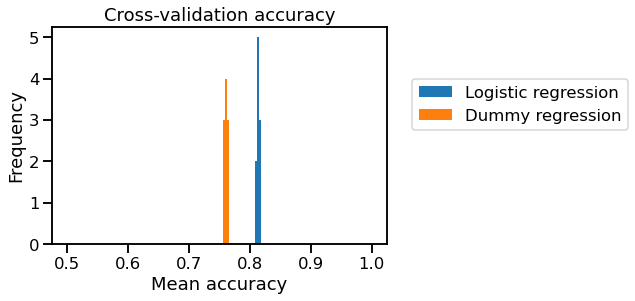

In [21]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=.5, stop=1, num=150)
all_accuracy.plot.hist(bins=bins)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean accuracy")
_ = plt.title("Cross-validation accuracy")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [22]:
dummy_strat = DummyClassifier(strategy="stratified")

cv_results_dummy_strat = cross_validate(
    dummy_strat, data, target, cv=cv, n_jobs=2
)

dummy_strat_classifier = pd.Series(
    cv_results_dummy_strat["test_score"], name="Stratified dummy regression"
)

dummy_strat_classifier

0    0.628312
1    0.635355
2    0.632857
3    0.638016
4    0.635887
5    0.636174
6    0.639941
7    0.631669
8    0.636870
9    0.638876
Name: Stratified dummy regression, dtype: float64

In [23]:
dummy_uni = DummyClassifier(strategy="uniform")

cv_results_dummy_uni = cross_validate(
    dummy_uni, data, target, cv=cv, n_jobs=2
)

dummy_uni_classifier = pd.Series(
    cv_results_dummy_uni["test_score"], name="Unified dummy regression"
)

dummy_uni_classifier

0    0.492609
1    0.499980
2    0.496663
3    0.502191
4    0.500430
5    0.499447
6    0.498423
7    0.497031
8    0.497891
9    0.498833
Name: Unified dummy regression, dtype: float64

In [24]:
all_accuracy = pd.concat(
    [LogRec_classifier, dummy_classifier, 
     dummy_strat_classifier, dummy_uni_classifier],
    axis=1,
)

all_accuracy

,Logistic regression,Dummy regression,Stratified dummy regression,Unified dummy regression
0,0.815937,0.760329,0.628312,0.492609
1,0.813849,0.756808,0.635355,0.499980
2,0.815036,0.759142,0.632857,0.496663
3,0.815569,0.760739,0.638016,0.502191
4,0.810982,0.761681,0.635887,0.500430
5,0.814709,0.761885,0.636174,0.499447
6,0.813112,0.757463,0.639941,0.498423
7,0.810327,0.757176,0.631669,0.497031
8,0.812416,0.761885,0.636870,0.497891
9,0.816388,0.763114,0.638876,0.498833


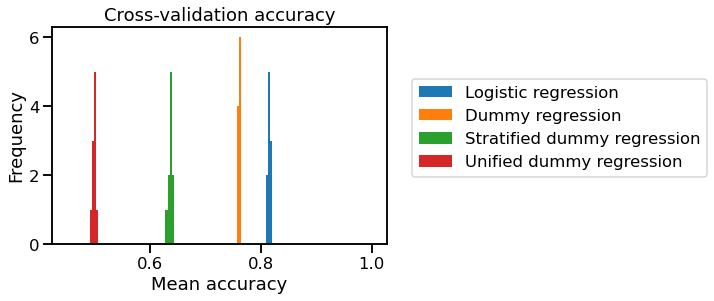

In [25]:
bins = np.linspace(start=.45, stop=1, num=150)
all_accuracy.plot.hist(bins=bins)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean accuracy")
_ = plt.title("Cross-validation accuracy")